#  Introduction to Data Visualization with Python

Welcome to the "Introduction to Data Visualization with Python" notebook! In this notebook, we will learn how to visualize biological data in Python to help us understand the underlying patterns in the data.

> NOTE: there are many different data formats used in biological sciences. This notebook focuses on tabular or matrix data because many biological datasets are analyzed as a table of numerical values.

In addition to this notebook, we recommend that you check out the [Data Visualization Platform](https://visualization.genelab.nasa.gov/data/) available through the NASA Open Science Data Repository (OSDR). This platform automates many of the visualizations that we are going to learn in this notebook, and allows users to create visualizations using one or several RNA sequencing datasets from OSDR. As a first step, try visualizing *OSD-255*, the RNA sequencing dataset we'll be visualizing in this notebook.

***Before starting this notebook, make a local copy in your Google Drive by selecting File > Save a Copy in Drive.***


## Data Loading and Basic Exploration

Before we can visualize and analyze our biological data, we need to load it into our working environment and take a look at its basic structure. This initial step includes loading the data from a source, checking for missing values, and understanding the basic statistics of the data. This will help us to get a sense of what our data looks like and prepare it for further analysis and visualization.

**Let's load a CSV file of scientific RNA sequencing data from the [NASA Open Science Data Repository (OSDR)](https://osdr.nasa.gov/bio/).** This data was collected from the retinas of mice that were flown on the [Rodent Research 9 (RR9)](https://www.nasa.gov/ames/space-biosciences/rodent-research-9-spacex-12/) mission to the International Space Station. As a reminder, the RR9 mission flew several NASA experiments to the International Space Station in order to assess the effects of microgravity on different biological systems.

We will use the OSDR API to access the file programmatically. More information on the OSDR API can be found [here](https://genelab.nasa.gov/genelabAPIs).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

First, let's use Pandas, a powerful library for data manipulation, to read in the data into a `dataframe` using the Pandas `read_csv()`.

We can then use `df.head()` to display the first few rows of the data.

In [2]:
# Read in the RNA sequencing CSV file into a pandas DataFrame
df = pd.read_csv('https://osdr.nasa.gov/geode-py/ws/studies/OSD-255/download?source=datamanager&file=GLDS-255_rna_seq_Normalized_Counts.csv', index_col=0)

# Print the first 5 rows of the DataFrame
df.head()

,GSM3932693,GSM3932694,GSM3932695,GSM3932696,GSM3932697,GSM3932698,GSM3932699,GSM3932700,GSM3932701,GSM3932702,GSM3932703,GSM3932704,GSM3932705,GSM3932706,GSM3932707,GSM3932708
ENSMUSG00000000001,265.491507,272.529585,264.891134,245.804042,205.478969,244.866957,250.587443,232.249604,241.739792,240.866309,278.344274,266.781019,238.447580,239.632932,242.777557,257.121918
ENSMUSG00000000028,22.737528,36.058646,30.659868,33.307123,11.896920,27.231801,21.727401,30.940275,34.840848,36.468997,29.993641,28.377921,19.433721,18.704883,26.226110,47.521611
ENSMUSG00000000031,5.574720,1.925595,2.899933,21.047427,0.000000,3.063051,7.105655,6.710188,3.266199,6.700680,1.852027,1.308210,2.248341,5.816845,2.041330,1.478741
ENSMUSG00000000037,14.601777,17.493816,16.577920,32.447456,12.940934,13.678983,9.358027,15.476949,25.085866,13.506677,24.809501,13.731740,21.564524,17.626982,28.873796,13.556234
ENSMUSG00000000049,3.107115,2.176549,0.642689,4.486992,0.895108,3.846941,2.640744,0.000000,0.000000,1.243833,0.000000,0.000000,1.676701,1.345919,0.769123,0.684388


> **In the table above, each row is a gene ("ENSMUSG00000000001") and each column is a different mouse sample ("GSM3932693"). The numerical values are the number of copies of that gene that was expressed in that mouse.**

Now, let's use a different API to collect metadata about which samples flew in space or were used as ground control.

In [3]:
meta = pd.read_csv('https://visualization.genelab.nasa.gov/GLOpenAPI/metadata/?id=OSD-255&study.factor%20value&study.characteristics', skiprows=[0])[['sample name','spaceflight']]
meta

,sample name,spaceflight
0,GSM3932693,Ground Control
1,GSM3932694,Ground Control
2,GSM3932695,Ground Control
3,GSM3932696,Ground Control
4,GSM3932697,Ground Control
5,GSM3932698,Ground Control
6,GSM3932699,Ground Control
7,GSM3932700,Ground Control
8,GSM3932701,Space Flight
9,GSM3932702,Space Flight


**CHALLENGE QUESTION:** Looking at the table above, how many space flight samples do we have? How many ground control?

**Double click here to enter your answer below.**

Answer:16 ; Ground Control - 8.

----

Now, let's use `df.describe()` to provide summary statistics like mean, median, and range for each columns. This helps us understand the data's general properties. More information on each statistic is available on the documentation for this function: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

`df.isnull().sum()` checks for any missing data. Missing data can cause problems later, so we need to know if and where we have any gaps.


In [4]:
# Basic statistics
df.describe()

,GSM3932693,GSM3932694,GSM3932695,GSM3932696,GSM3932697,GSM3932698,GSM3932699,GSM3932700,GSM3932701,GSM3932702,GSM3932703,GSM3932704,GSM3932705,GSM3932706,GSM3932707,GSM3932708
count,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000
mean,512.726276,513.605503,512.227744,505.151464,511.341816,505.354348,515.216720,507.159108,502.935334,501.027174,504.417485,495.792299,515.620253,511.034582,495.971955,530.097184
std,6645.738077,6359.846063,6565.152404,6533.558532,5833.765758,6621.133118,6845.784958,7015.375606,6036.836634,5639.879241,6000.294802,5830.642219,8202.647284,6538.832473,5708.932273,6721.335537
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.699563,5.048580,4.192133,5.254688,4.670302,5.017633,4.305536,5.055508,4.994721,5.645321,4.748178,5.530256,5.345533,4.388863,5.016007,4.463735
50%,53.360684,60.744720,54.518688,60.475645,54.192978,55.422527,53.481923,58.573261,54.943407,61.707703,56.087749,56.810383,58.344083,55.151272,56.179740,55.408958
75%,330.955645,339.404120,332.633804,336.375425,330.729391,328.699611,333.251764,333.817185,331.048019,330.250317,331.580264,332.084725,327.340564,334.698276,330.558455,334.807313
max,635249.906785,599072.886767,608190.964522,617755.182030,524055.405690,635418.576947,654920.576524,680114.742215,538243.870338,499022.116456,545447.299604,526328.573490,817690.021357,609601.293711,503250.238443,580769.929410


In [5]:
# Check for missing values
print(df.isnull().sum())

GSM3932693    0
GSM3932694    0
GSM3932695    0
GSM3932696    0
GSM3932697    0
GSM3932698    0
GSM3932699    0
GSM3932700    0
GSM3932701    0
GSM3932702    0
GSM3932703    0
GSM3932704    0
GSM3932705    0
GSM3932706    0
GSM3932707    0
GSM3932708    0
dtype: int64


## Correlation Matrix and Heatmap

A correlation matrix shows how much each sample is related to every other sample. For example, in biological data, you might find that certain samples are related because of the underlying biological processes. Visualizing this with a heatmap can help us quickly identify strong relationships between samples.


Then, we'll create a heatmap to visualize the pairwise correlation values between all samples.
> A heatmap is a data visualization technique that represents values in a matrix or a grid with color coding. This type of graph is used to depict the magnitude of a phenomenon as color in two dimensions, which can reveal patterns in the data. **Interpreting a heatmap involves looking for areas of high intensity ("hot" spots, usually colored red) and low intensity ("cold" spots, usually colored blue). Hot spots indicate areas with high values, while cold spots show areas with low values.**



We'll use the Pandas method `corr()` to calculate the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between all the samples. This is a common method of calculating correlation. **Correlation values range from 0 to 1, with 0 being completely uncorrelated and 1 being exactly the same.**

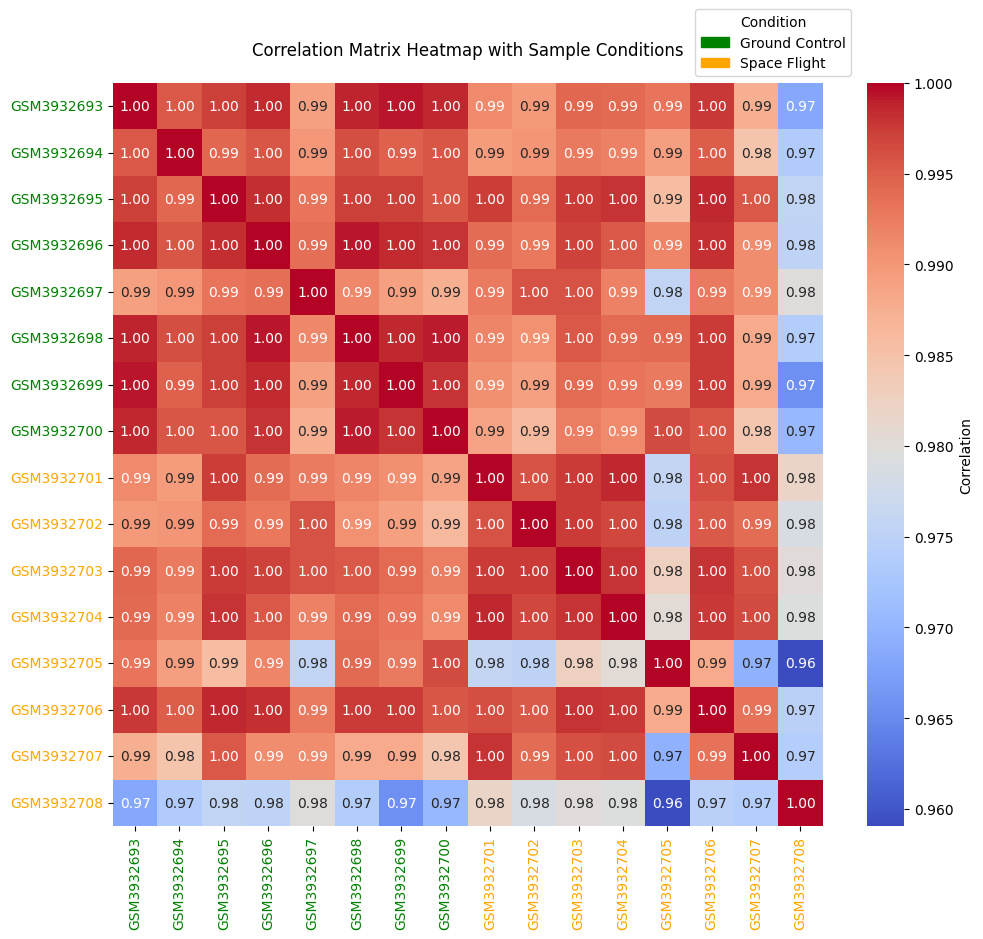

In [6]:
# Compute the correlation matrix
corr_matrix = df.corr(method='pearson')

# Create a color map for the conditions
condition_colors = ['green' if x == 'Ground Control' else 'orange' for x in list(meta['spaceflight'])]

# Create a color bar (color strip) DataFrame
# color_bar = pd.DataFrame([condition_values], columns=df.columns)

# Create the heatmap
fig, ax2 = plt.subplots(figsize=(12, 10))

# Plot the correlation matrix heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=ax2, cbar_kws={'label': 'Correlation'}, yticklabels=df.columns, xticklabels=df.columns)

# Add the color bar as a separate heatmap
for tick_label, color in zip(ax2.get_xticklabels(), condition_colors):
    tick_label.set_color(color)
for tick_label, color in zip(ax2.get_yticklabels(), condition_colors):
    tick_label.set_color(color)

# Add legend manually
import matplotlib.patches as mpatches
ground_patch = mpatches.Patch(color='green', label='Ground Control')
space_patch = mpatches.Patch(color='orange', label='Space Flight')
plt.legend(handles=[ground_patch, space_patch], title='Condition', bbox_to_anchor=(1.05, 1), loc='lower right')

plt.title('Correlation Matrix Heatmap with Sample Conditions', pad=20)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.85, 0.95])

plt.show()


**CHALLENGE QUESTIONS:**
1. Why are some samples labeled in green, and some in yellow?
2. What is the correlation between samples GSM3932693 and GSM3932701? Is this surprising? Why? (*Hint:* think about the groups that these samples belong to.)
3. Take a look at the diagonal values running from the top left to the bottom right. Why are they all 1.00?
4. Are there sample(s) which seem to have lower overall correlation values with all the other samples? If so, you may want to keep an eye on these samples because they may be outliers that will skew your analysis.

**Double click here to enter your answers below.**

Answers:

1.Green - Ground Control ; Yellow - Space Flight.

2.The correlation between samples GSM3932693 and GSM3932701 is 0.99, this suggests an extremely strong positive linear relationship between their expression profiles.Since, they belong to different groups, the high correlation is unusual and might suggest issues like batch effects, or a lack of differential expression between conditions.

3.The diagonal values running from the top left to the bottom right are all 1.00 because they represent the correlation of each sample with itself. Since a sample is perfectly correlated with itself, the correlation coefficient is always 1.00 on the diagonal.

4.no

## Histogram of Gene Expression Values

A histogram shows how often different values or ranges of values occur in a dataset.

*Key Features of a Histogram:*

- **Bars:** A histogram consists of vertical bars. Each bar represents a range of values (also called a "bin").
- **Bins:** These are the intervals or ranges into which the data is grouped. For example, if you are looking at the heights of students, one bin might be for heights between 150-160 cm, another for 160-170 cm, and so on.
- **Frequency:** The height of each bar shows how many data points fall within that range. A taller bar means more data points fall into that range.

Below, we'll use the Python matplotlib function `hist()` to generate a histogram that shows the different gene expression values of the gene "ENSMUSG00000000001".

Text(0.5, 1.0, 'Histogram of Overall Expression for Gene ENSMUSG00000000001')

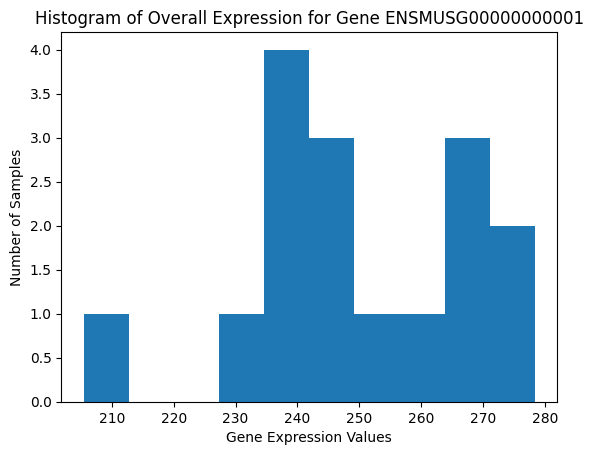

In [ ]:
plt.hist(df.transpose()['ENSMUSG00000000001'])
plt.xlabel('Gene Expression Values')
plt.ylabel('Number of Samples')
plt.title('Histogram of Overall Expression for Gene ENSMUSG00000000001')

**CHALLENGE QUESTIONS:**

1. How many samples express 210 copies of gene "ENSMUSG00000000001"?
2. How many samples express 240 copies of gene "ENSMUSG00000000001"?



**Double click here to enter your answers below.**

Answers:

1.1

2.4

## Scatter Plot Between Samples


A scatter plot is a type of graph used to display the relationship between two numerical variables. In our case, we will use it to display the relationship between the gene expression values within 2 samples. Each point on the plot represents a data point in the dataset - in our case, each point on the plot represents the expression values of a single gene.
> Each point (gene) has an x-axis and a y-axis value. The x-axis value is the  expression of that gene in the sample labeled on the x-axis, while the y-axis value is the expression of that gene in the sample labeled on the y-axis.

By looking at the scatter plot, you can identify patterns or relationships between the two variables, such as:

- Positive Correlation: As one variable increases, the other variable also increases. The points trend upward from left to right.
- Negative Correlation: As one variable increases, the other variable decreases. The points trend downward from left to right.
- No Correlation: There is no obvious pattern. The points are scattered randomly.

You can also see if there are specific points (genes) which are expressed more highly in one sample or the other.

Let's use the Python seaborn function `scatterplot()` to create a couple of scatterplots.

First, we'll plot the relationship between the first Ground Control sample (GSM3932693) and the first Space Flight sample (GSM3932701).

**CHALLENGE QUESTION:** Looking back at the heatmap, are these 2 samples positively or negatively correlated with each other? Based on this, how do you expect the scatterplot to appear?


**Double click here to enter your answer below.**

Answer:

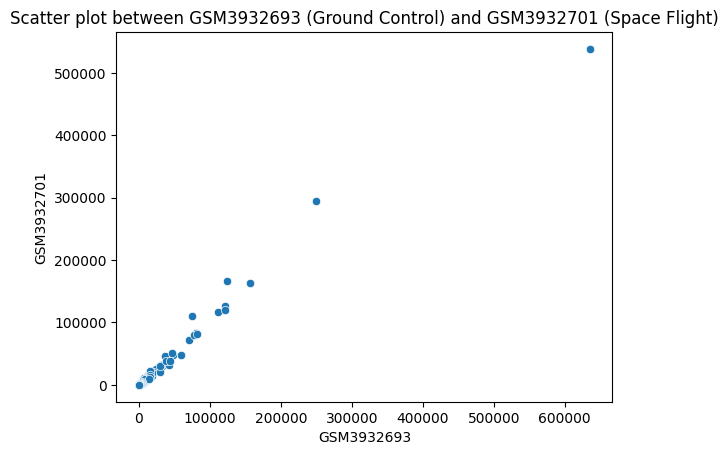

In [7]:
# Scatter plot between the first Ground Control sample (GSM3932693) and the first Space Flight sample (GSM3932701)
sns.scatterplot(x='GSM3932693', y='GSM3932701', data=df)
plt.title('Scatter plot between GSM3932693 (Ground Control) and GSM3932701 (Space Flight)')
plt.show()



Looking at the scatter plot above, we can observe a positive correlation, with points trending upward from left to right.

Now, let's plot the relationship between the first Ground Control sample (GSM3932693) and the last Space Flight sample (GSM3932708).

**CHALLENGE QUESTION:** Looking back at the heatmap, how do these samples relate to each other? How do you expect the scatter plot to appear?

**Double click here to enter your answer below.**

Answer:Linear relationship

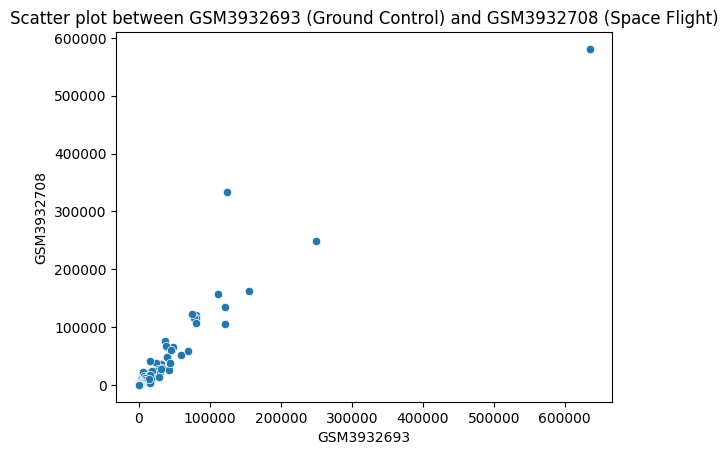

In [8]:
# Scatter plot between the first Ground Control sample (GSM3932693) and the last Space Flight sample (GSM3932708)
sns.scatterplot(x='GSM3932693', y='GSM3932708', data=df)
plt.title('Scatter plot between GSM3932693 (Ground Control) and GSM3932708 (Space Flight)')
plt.show()

**CHALLENGE QUESTION:** How does this scatterplot compare to the first one? Are there more genes that seem to be expressed more highly in one sample compared to the other? Does this make sense with the heatmap?

**Double click here to enter your answer below.**

Answer:They are more scattered compared to the first one suggesting  there are more genes that has expressed more higher.

## Pair Plot Between Genes

A pair plot allows you to examine the relationships between multiple pairs of variables in a dataset (in our case, relationships between genes). It's particularly useful when you have several numerical variables and want to understand how they correlate with each other.

*Key Features of a Pair Plot:*
- Matrix Structure: In a pair plot, the variables are arranged in a grid or matrix format. Each variable is plotted against every other variable in the dataset, creating a matrix of scatterplots.

- Scatterplots: Each cell in the matrix contains a scatter plot of two variables.
The scatter plot in each cell shows the relationship between the corresponding pair of variables.

- Diagonal Elements: The diagonal of the matrix contains histograms for each variable.


Pair plots allow you to quickly visualize relationships between multiple variables in a dataset. You can examine scatter plots to understand how variables are related to each other (e.g., positive correlation, negative correlation, or no correlation). Additionally, you can analyze the diagonal plots to understand the distribution of each variable individually.

Let's use the Python seaborn `pairplot()` function to create a small pair plot to compare 2 of the genes from our dataset: 'ENSMUSG00000000001' and 'ENSMUSG00000000028'.

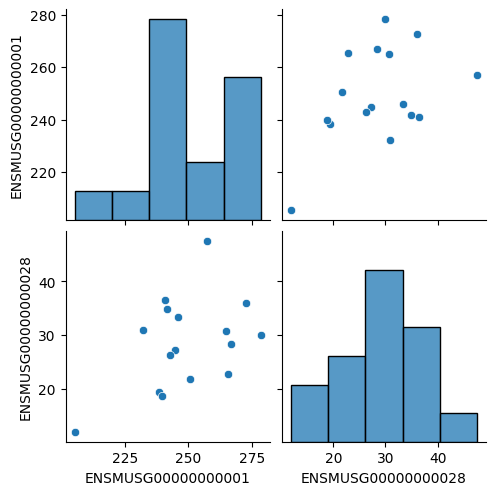

In [9]:
# Pair plot for a subset of features
subset_features = ['ENSMUSG00000000001', 'ENSMUSG00000000028']#, 'feature3', 'feature4']
sns.pairplot(df.transpose()[subset_features])
plt.show()


**CHALLENGE QUESTIONS:**

1. Take a look at the scatter plots in the pair plot above. Are the genes positively or negatively correlated with each other?
2. Take a look at the histograms in the pair plot above. How high is the gene expression for the largest group of samples (bar) for gene ENSMUSG00000000001? What about gene ENSMUSG00000000028?


**Double click here to enter your answers below.**

Answers:

1.The scatter plots in the pair plot suggest that the two genes, ENSMUSG00000000001 and ENSMUSG00000000028, do not have a strong correlation, as the points are widely scattered rather than forming a clear upward or downward trend. This indicates that changes in the expression of one gene do not strongly predict changes in the other.

2.The histograms show that for ENSMUSG00000000001, the most common expression level falls within the range of 250-275, while for ENSMUSG00000000028, the most frequent expression levels are between 30-40. These distributions help in understanding the variation in gene expression across samples and can be useful in identifying patterns or anomalies in the dataset.